In [165]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [166]:
data = pd.read_csv('../data/international-airline-passengers.csv', engine='python', skipfooter=3)
data.columns = ['Month','#Passengers']
data['Month'] = pd.to_datetime(data['Month'],format='%Y-%m')
data.set_index('Month', inplace=True)
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
1949-06-01,135
1949-07-01,148
1949-08-01,148
1949-09-01,136


In [167]:
data.dtypes

#Passengers    int64
dtype: object

In [168]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [169]:
ts = data['#Passengers']

In [170]:
train_size = int(len(ts) * 0.67)
test_size = len(ts) - train_size
train, test = ts[0:train_size], ts[train_size:len(ts)]
print(train.head(), len(train))
print(test.head(), len(test), type(test))

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64 96
Month
1957-01-01    315
1957-02-01    301
1957-03-01    356
1957-04-01    348
1957-05-01    355
Name: #Passengers, dtype: int64 48 <class 'pandas.core.series.Series'>


### Estimating & Eliminating Trend

In [176]:
train_log.shape

(96,)

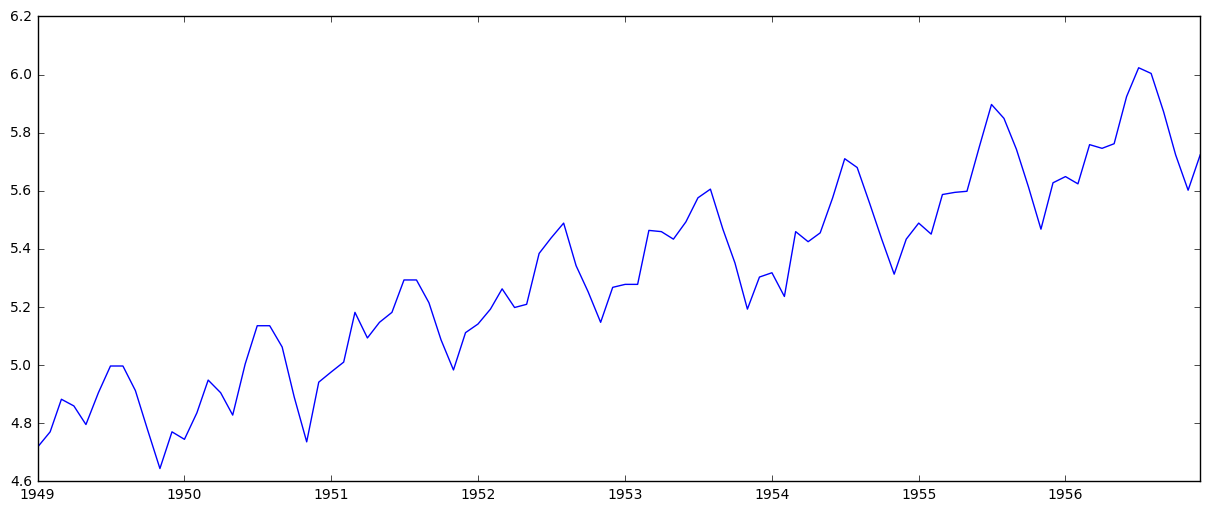

In [171]:
train_log = np.log(train)
plt.plot(train_log)

### Diferencing

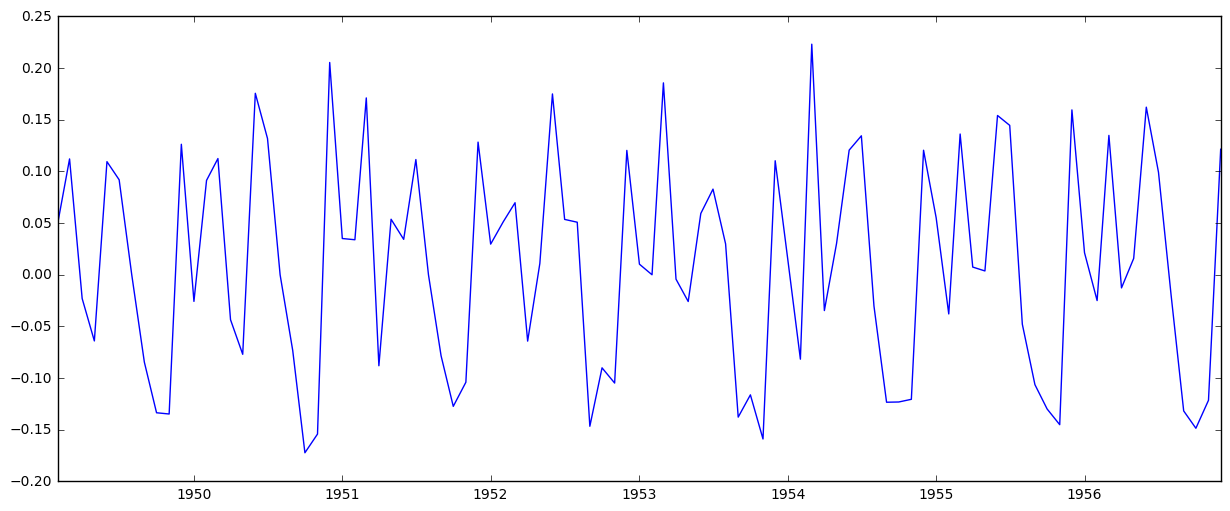

In [172]:
train_log_diff = train_log - train_log.shift(1)
train_log_diff.dropna(inplace=True)
plt.plot(train_log_diff)

In [177]:
len(train_log_diff)

95

In [179]:
import statsmodels
print(statsmodels.__version__)

print(pd.__version__)

0.6.1
0.19.2+0.g825876c.dirty


### ARIMA Model

In [174]:
from statsmodels.tsa.arima_model import ARIMA

C:\Users\Santiago\Anaconda3\lib\site-packages\statsmodels\base\model.py:466: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


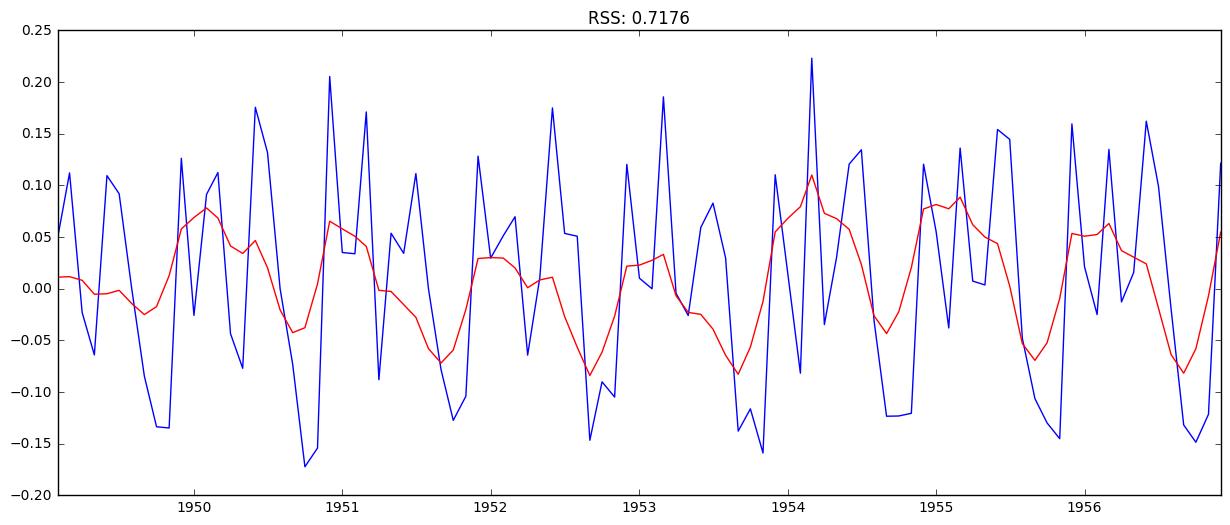

In [175]:
model = ARIMA(train_log, order=(2,1,2))
results_ARIMA = model.fit(disp=-1)  
plt.plot(train_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-train_log_diff)**2))

### Converting to original scale

In [146]:
len(results_ARIMA.fittedvalues)

95

In [147]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Month
1949-02-01    0.011257
1949-03-01    0.011711
1949-04-01    0.008209
1949-05-01   -0.005264
1949-06-01   -0.004796
dtype: float64

In [148]:
predictions_ARIMA_diff

Month
1949-02-01    0.011257
1949-03-01    0.011711
1949-04-01    0.008209
1949-05-01   -0.005264
1949-06-01   -0.004796
1949-07-01   -0.001493
1949-08-01   -0.014288
1949-09-01   -0.024966
1949-10-01   -0.017249
1949-11-01    0.012744
1949-12-01    0.057893
1950-01-01    0.068960
1950-02-01    0.078233
1950-03-01    0.068426
1950-04-01    0.041434
1950-05-01    0.034161
1950-06-01    0.046708
1950-07-01    0.020337
1950-08-01   -0.020470
1950-09-01   -0.042450
1950-10-01   -0.037703
1950-11-01    0.004673
1950-12-01    0.065409
1951-01-01    0.057967
1951-02-01    0.050801
1951-03-01    0.041040
1951-04-01   -0.001486
1951-05-01   -0.002635
1951-06-01   -0.015336
1951-07-01   -0.027608
                ...   
1954-07-01    0.023548
1954-08-01   -0.025968
1954-09-01   -0.043375
1954-10-01   -0.022274
1954-11-01    0.020621
1954-12-01    0.077207
1955-01-01    0.081577
1955-02-01    0.077420
1955-03-01    0.088640
1955-04-01    0.061982
1955-05-01    0.050046
1955-06-01    0.043683
1955-

In [149]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.011257
1949-03-01    0.022968
1949-04-01    0.031178
1949-05-01    0.025914
1949-06-01    0.021118
dtype: float64

In [150]:
predictions_ARIMA_diff_cumsum

Month
1949-02-01    0.011257
1949-03-01    0.022968
1949-04-01    0.031178
1949-05-01    0.025914
1949-06-01    0.021118
1949-07-01    0.019625
1949-08-01    0.005337
1949-09-01   -0.019630
1949-10-01   -0.036878
1949-11-01   -0.024134
1949-12-01    0.033759
1950-01-01    0.102719
1950-02-01    0.180952
1950-03-01    0.249378
1950-04-01    0.290813
1950-05-01    0.324974
1950-06-01    0.371682
1950-07-01    0.392019
1950-08-01    0.371549
1950-09-01    0.329099
1950-10-01    0.291396
1950-11-01    0.296069
1950-12-01    0.361478
1951-01-01    0.419445
1951-02-01    0.470246
1951-03-01    0.511286
1951-04-01    0.509800
1951-05-01    0.507165
1951-06-01    0.491829
1951-07-01    0.464221
                ...   
1954-07-01    0.461228
1954-08-01    0.435260
1954-09-01    0.391885
1954-10-01    0.369611
1954-11-01    0.390232
1954-12-01    0.467439
1955-01-01    0.549016
1955-02-01    0.626436
1955-03-01    0.715076
1955-04-01    0.777058
1955-05-01    0.827104
1955-06-01    0.870787
1955-

In [151]:
predictions_ARIMA_log = pd.Series(train_log.ix[0], index=train_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.729756
1949-03-01    4.741467
1949-04-01    4.749677
1949-05-01    4.744413
dtype: float64

In [152]:
a = pd.Series(train_log.ix[0], index=train_log.index)
a

Month
1949-01-01    4.718499
1949-02-01    4.718499
1949-03-01    4.718499
1949-04-01    4.718499
1949-05-01    4.718499
1949-06-01    4.718499
1949-07-01    4.718499
1949-08-01    4.718499
1949-09-01    4.718499
1949-10-01    4.718499
1949-11-01    4.718499
1949-12-01    4.718499
1950-01-01    4.718499
1950-02-01    4.718499
1950-03-01    4.718499
1950-04-01    4.718499
1950-05-01    4.718499
1950-06-01    4.718499
1950-07-01    4.718499
1950-08-01    4.718499
1950-09-01    4.718499
1950-10-01    4.718499
1950-11-01    4.718499
1950-12-01    4.718499
1951-01-01    4.718499
1951-02-01    4.718499
1951-03-01    4.718499
1951-04-01    4.718499
1951-05-01    4.718499
1951-06-01    4.718499
                ...   
1954-07-01    4.718499
1954-08-01    4.718499
1954-09-01    4.718499
1954-10-01    4.718499
1954-11-01    4.718499
1954-12-01    4.718499
1955-01-01    4.718499
1955-02-01    4.718499
1955-03-01    4.718499
1955-04-01    4.718499
1955-05-01    4.718499
1955-06-01    4.718499
1955-

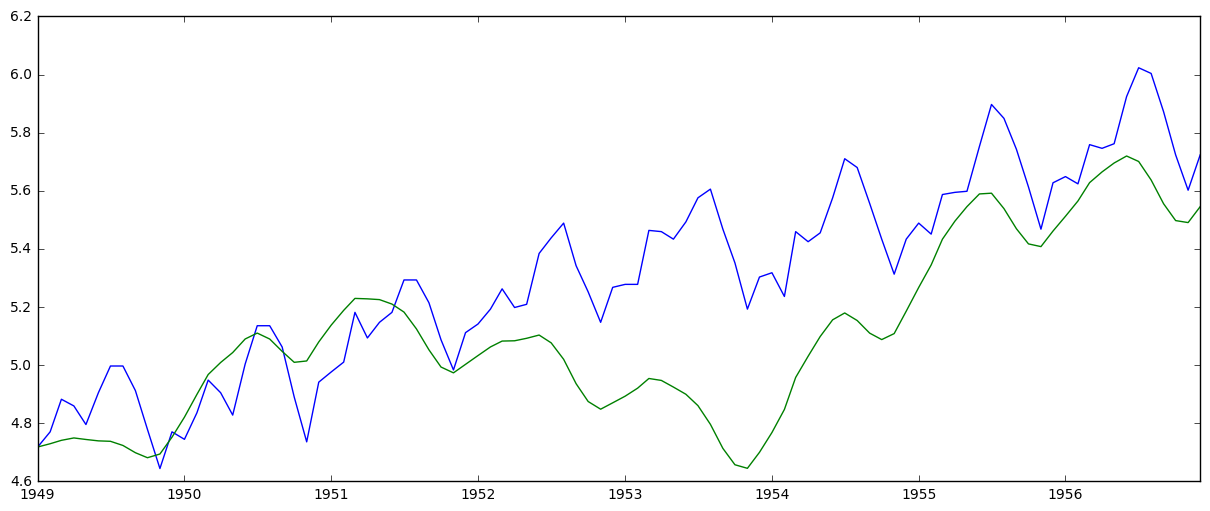

In [163]:
plt.plot(train_log)
plt.plot(predictions_ARIMA_log)

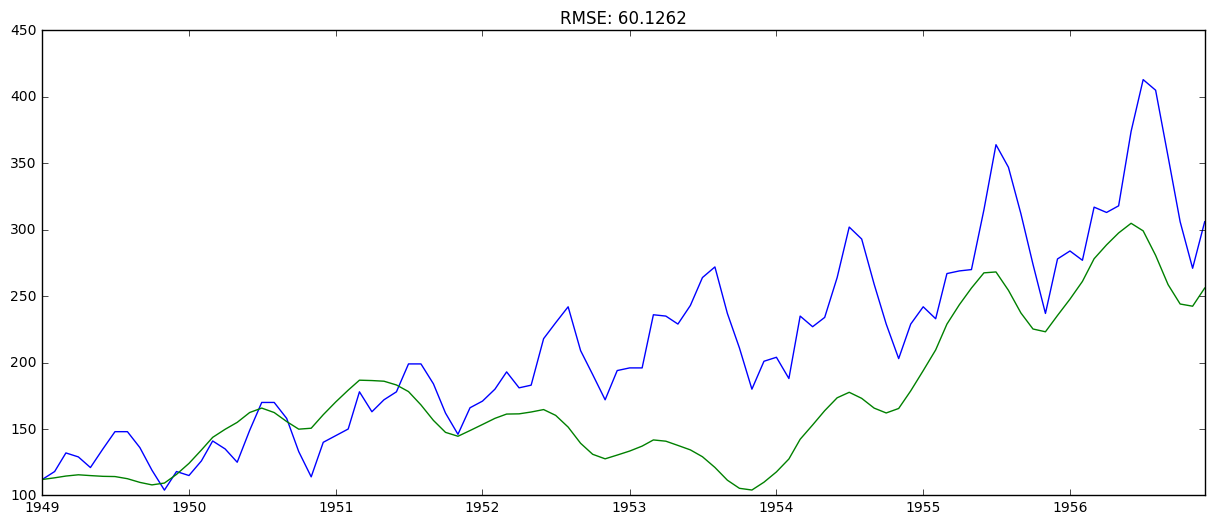

In [164]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(train)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-train)**2)/len(train)))

### Predicting

In [155]:
results_ARIMA

In [156]:
test_forecast_diff = results_ARIMA.predict(start=96, end=143, dynamic=True)

C:\Users\Santiago\Anaconda3\lib\site-packages\statsmodels\base\data.py:503: FutureWarning: TimeSeries is deprecated. Please use Series
  return TimeSeries(result, index=self.predict_dates)


In [157]:
test_forecast_diff_cumsum = test_forecast_diff.cumsum()

In [158]:
print(len(train_log))
train_log.ix[(len(train_log) - 1)]

96


5.7235851019523807

In [159]:
test_forecast_ARIMA_log = pd.Series(train_log.ix[(len(train_log) - 1)], index=test_log.index)
test_forecast_ARIMA_log = test_forecast_ARIMA_log.add(test_forecast_diff_cumsum,fill_value=0)
test_forecast_ARIMA = np.exp(test_forecast_ARIMA_log)
test_forecast_ARIMA

Month
1957-01-01    325.082662
1957-02-01    344.010874
1957-03-01    359.578180
1957-04-01    370.281295
1957-05-01    376.267780
1957-06-01    378.785366
1957-07-01    379.468266
1957-08-01    379.777928
1957-09-01    380.719654
1957-10-01    382.793617
1957-11-01    386.082473
1957-12-01    390.391937
1958-01-01    395.392809
1958-02-01    400.737672
1958-03-01    406.140199
1958-04-01    411.414638
1958-05-01    416.480508
1958-06-01    421.342949
1958-07-01    426.061215
1958-08-01    430.716456
1958-09-01    435.386248
1958-10-01    440.129123
1958-11-01    444.978875
1958-12-01    449.946300
1959-01-01    455.025290
1959-02-01    460.200375
1959-03-01    465.453573
1959-04-01    470.769326
1959-05-01    476.137136
1959-06-01    481.552170
1959-07-01    487.014422
1959-08-01    492.527129
1959-09-01    498.095057
1959-10-01    503.723077
1959-11-01    509.415222
1959-12-01    515.174279
1960-01-01    521.001789
1960-02-01    526.898322
1960-03-01    532.863869
1960-04-01    538.8

In [160]:
test_df = pd.DataFrame(test)
test_df['forecast'] = test_forecast_ARIMA
test_df

,#Passengers,forecast
Month,,
1957-01-01,315,325.082662
1957-02-01,301,344.010874
1957-03-01,356,359.578180
1957-04-01,348,370.281295
1957-05-01,355,376.267780
1957-06-01,422,378.785366
1957-07-01,465,379.468266
1957-08-01,467,379.777928
1957-09-01,404,380.719654


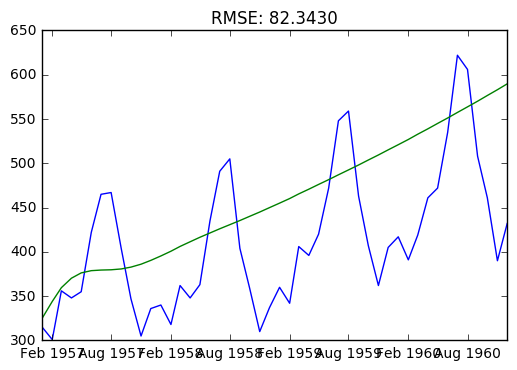

In [161]:
plt.plot(test_df)
plt.title('RMSE: %.4f'% np.sqrt(sum((test_df['forecast']-test_df['#Passengers'])**2)/len(test_df)))